# Solving equations

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, fsolve

## Review: linear equations
To solve a system $Ax=b$ for x, we do the following:
* Define the matrix $A$ and the array $b$.
* Use x = np.linalg.solve(A,b)

**Example**

Solve 
$$\left[
\begin{array}[ccccc]
--2 & 1  & 0 & 0 & 0 \\
1  & -2 & 1 & 0 & 0 \\
0  &  1 & -2& 1 & 0 \\
0  &  0 & 1 & -2& 1 \\
0  &  0 & 0 & 1 & -2
\end{array}
\right]\cdot
\left[
\begin{array}[c] \\x_0\\x_1\\x_2\\x_2\\x_4\end{array}\right] = 
\left[\begin{array}[c] \\1\\1\\1\\1\\1\end{array}\right]$$


In [53]:
A = np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,-2]])
b = np.ones(5)

x = np.linalg.solve(A,b)

print("x = ", x)

x =  [-2.5 -4.  -4.5 -4.  -2.5]


Here's a [link](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) to more linear algebra operations.

## Nonlinear equations
### 1-D equations (1 equation in 1 unknown).

Solving a nonlinear equation involves first putting it in the form $f(x)=0$. We know the function $f$ and we want to find the value of $x$ that gives $f(x)=0$.

To solve this, do the following:
* Define the function f(x)
* Set an initial guess for x.
* We need to import a library: ```from scipy.optimize import fsolve```
* Call the ```fsolve``` function: ```x = fsolve(f, x0)```
    * f is the name of the function you are solving, and x0 is your initial guess.
    


### Exercise

Solve for both roots of $$f(x) = x^2-5.$$

In [54]:

def f(x):
    return x**2 - 5

xguess_1 = 1.0
x1 = fsolve(f,xguess_1)

xguess_2 = -1.0
x2 = fsolve(f,xguess_2)

print(x1, x2)

[ 2.23606798] [-2.23606798]


### Note
* ```fsolve``` returns an array of solutions.
* This is because ```fsolve``` can be used to find the solution to multiple equations in multiple unknowns.
* If you just have one equation in one unknown, they you can recover just the scalar answer instead of the array:
    * ```x = fsolve(f, xguess)[0]```

### Multiple equations in multiple unknowns
* We call this a *multi-dimensional* problem.
* Instead of $f(x)=0$, we solve
* $\vec{f}(\vec{x})=\vec{0}$.
    * That is, $\vec{x}$ is a vector of unknowns, and $\vec{f}$ is a vector of functions.
    * $\vec{f}(\vec{x})$ takes a vector $\vec{x}$, and returns a vector $\vec{f}$.


### Details

* Consider solving the **two functions** for the **two unknowns**: $h(y,z) = 0$, and $g(y,z)=0$.
* We might have $$h(y,z)=y+2z,$$ $$g(y,z) = \sin(y)/z$$
* For computer solvers, we write using a generic, standard notation. 
    * *<font color=red>We want all solvers to look like $f(x)=0.$</font>*
* We would write these as $$f_0(x_0,x_1) = x_0+2x_1,$$ $$f_1(x_0,x_1) = \sin(x_0)/x_1,$$
which becomes: $$\left[\begin{matrix} f_0(x_0,x_1) \\ f_1(x_0,x_1)\end{matrix}\right] = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \left[\begin{matrix}0 \\ 0\end{matrix}\right],$$
or $$\vec{f}(\vec{x}) = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \vec{0},$$
that is, $$\vec{f}(\vec{x})=\vec{0}.$$

* We solve the system just like before:
    * Just define the vector function. It takes an array of unknowns $\vec{x}$, and returns an array of function values $\vec{f}$.
    * We use the same solver, but we give an array of initial guesses $\vec{x}_0$.


**Note** Here is a [link](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to more information about the fsolve function with extra arguments that can give more control over the solution process.

### Exercise
* Solve the following two equations in two unknowns.
$$h(y,z)=y+2z,$$ 
$$g(y,z) = \sin(y)/z.$$
* Use $y_0=1$, and $z_0=2$ as an initial guess.

In [55]:
def hg(yz):
    
    y = yz[0]                 # recover the vars for convenience
    z = yz[1]
    
    h = y + 2*z              # compute the function values
    g = np.sin(y)/z
    
    return np.array([h, g])  # return array of function values

#---------------------------------

yzGuess = np.array([1,2])
yz = fsolve(hg, yzGuess)
y = x[0]
z = x[1]
print(f"y={y:.4f}, z={z:.4f}")

y=-2.5000, z=-4.0000


### Excercise

Solve the following system of three equations in three unknowns:

$$x^2 + y^2 = 1,$$
$$xy + yz = -1.1,$$
$$y^2 + z^2 = 2.$$

A reasonable guess for all variables is $x=y=z=2.$


In [56]:
def funcs(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    
    eq0 = x**2 + y**2 - 1
    eq1 = x*y + y*z   + 1.1
    eq2 = y**2 + z**2 - 2
    
    return np.array([eq0, eq1, eq2])

xyzGuess = np.array([2,2,2])
xyz = fsolve(funcs, xyzGuess)
x = xyz[0]
y = xyz[1]
z = xyz[2]

print(f'x={x:.5f}, y={y:.5f}, z={z:.5f}')

x=0.10056, y=-0.99493, z=1.00504


### Exercise

The Colbrook equation is used to compute pressure drops across pipes, and therefore to compute pumping requirements and costs.

The Colebrook equation is given by
$$\frac{1}{\sqrt{f}} = -2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{Re\sqrt{f}}\right),$$
or,
$$F(f, Re, \epsilon/D) = \frac{1}{\sqrt{f}} + 2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{Re\sqrt{f}}\right)=0.$$

* Solve the Colbrook equation for $f$, for each $Re$ listed below, for the given single value of $\epsilon/D$.  
* Plot the result of $f(Re)$ with $Re$ on a log scale.

**Approach**
* Remember to start simple, then add more functionality.
* Verify results at each step.
* Question: what are the different parts required?
* Question: What is a useful, basic thing to start with?
* Question: Should you start with a loop, or a plot, or a function, or the solver...


In [57]:
Re     = np.logspace(3,8,1000)
epsD   = 0.001
fguess = 0.01

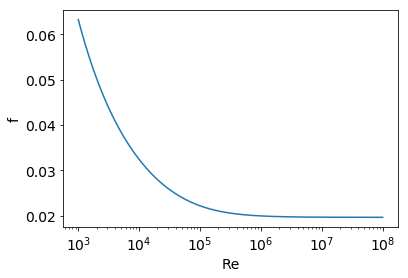

In [58]:
def F(f, Re, epsD):
    return 1/np.sqrt(f) + 2.0*np.log10(epsD/3.7 + 2.51/Re/np.sqrt(f))

f = np.zeros(len(Re))
for i in range(len(f)):
    f[i] = fsolve(F, fguess, args=(Re[i], epsD))[0]
    
#---------- Plot 

plt.rc("font", size=14)
plt.plot(Re,f)
plt.xscale("log")
plt.xlabel("Re")
plt.ylabel("f");
    

## ```args``` and tuple expansion

* Functions like ```fsolve```, ```quad``` and others have an argument called ```args``` that you can set to have those functions pass extra arguments to the function provide.
* But ```fsolve``` and ```quad``` (etc.) don't know how many arguments there are, and there could be an arbitrary number.
* **Tuple expansion to the rescue!**

### Example 1
* Below, function ```f``` can take any number of arguments.
* ```args``` is a tuple, and the ```*``` part of ```*args``` can be thought of as **collapsing** the provided list of arguments into the tuple ```args```. 
    * The name ```args``` doesn't matter. It can be anything.
* You can then loop over the elements of ```args```.

In [59]:
def f(*args):
    print(args)        # args is a tuple
    for arg in args:   # loop over elements of args
        print(arg)
    
f(1.1, 2.2, 3.3)       # call the func with multiple arguments

(1.1, 2.2, 3.3)
1.1
2.2
3.3


### Example 2

* Below, function ```f``` takes three arguments.
* When calling the function, we first make a tuple with three elements,
* Then we **expand** the tuple into values using ```*xyz```. 
    * The ```*``` part of ```*xyz``` acts to **expand** the tuple into elements that are then placed in the individual arguments that the function takes.

In [60]:
def f(x,y,z):
    print(x)
    print(y)
    print(z)
    
xyz = (1.1, 2.2, 3.3)
f(*xyz)

1.1
2.2
3.3


### Example 3
* Write my own version of ```quad``` that uses the trapazoid method, and passes in extra arguments that my function will need.
* See the line ```fx = f(x, *args)``` where the tuple of ```args``` I pass in to ```myQuad``` is expanded into the coefficients ```c0```, ```c1```, and ```c2``` of my quadratic function, defined below.

In [63]:
def myQuad(f, a, b, n=100, args=None):
    x = np.linspace(a,b,n)
    Δx = x[1]-x[0]
    if args is None:
        fx = f(x)
    else:
        fx = f(x, *args)
    I = -Δx/2*(fx[0]+fx[-1]) + Δx*np.sum(fx)
    return I
    
#---------------

def f(x, c0, c1, c2):
    return c2*x**2 + c1*x + c0

#---------------

I = myQuad(f, 0, 2, args=(1.1, 2.2, 3.3))
print(I)

15.4004489338
